## classifying movie reviews: binary classification

### loading IMDB dataset

In [1]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
print(len(train_data), 'train sequences')
print(len(test_data), 'test sequences')

25000 train sequences
25000 test sequences


### vectorizing sequences

In [2]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    #create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  #set specific indices of results[i] to 1s
    return results

#vectorized training data
x_train = vectorize_sequences(train_data)
#vectorized test data
x_test = vectorize_sequences(test_data)

In [3]:
#vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [4]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (25000, 10000)
x_test shape: (25000, 10000)


### creating validation data

In [5]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [6]:
print('partial_x_train shape:', partial_x_train.shape)
print('partial_y_train shape:', partial_y_train.shape)

partial_x_train shape: (15000, 10000)
partial_y_train shape: (15000,)


In [7]:
print('x_val shape:', x_val.shape)
print('y_val shape:', y_val.shape)

x_val shape: (10000, 10000)
y_val shape: (10000,)


### training dense network

In [8]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [9]:
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [10]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 8s 274ms/step - loss: 0.5637 - binary_accuracy: 0.7754 - val_loss: 0.4365 - val_binary_accuracy: 0.8572
Epoch 2/20
30/30 [==============================] - 3s 101ms/step - loss: 0.3441 - binary_accuracy: 0.8956 - val_loss: 0.3341 - val_binary_accuracy: 0.8740
Epoch 3/20
30/30 [==============================] - 3s 101ms/step - loss: 0.2454 - binary_accuracy: 0.9191 - val_loss: 0.2856 - val_binary_accuracy: 0.8903
Epoch 4/20
30/30 [==============================] - 3s 96ms/step - loss: 0.1905 - binary_accuracy: 0.9383 - val_loss: 0.2799 - val_binary_accuracy: 0.8874
Epoch 5/20
30/30 [==============================] - 3s 100ms/step - loss: 0.1579 - binary_accuracy: 0.9483 - val_loss: 0.2882 - val_binary_accuracy: 0.8827
Epoch 6/20
30/30 [==============================] - 4s 118ms/step - loss: 0.1308 - binary_accuracy: 0.9591 - val_loss: 0.2844 - val_binary_accuracy: 0.8872
Epoch 7/20
30/30 [==============================] - 4s 118ms/step

### evaluating model

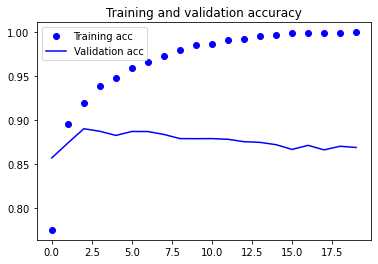

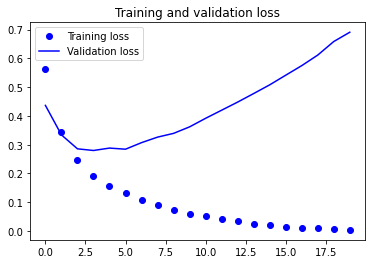

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [12]:
np.argmax(val_acc)+1

3

In [13]:
round(val_acc[np.argmax(val_acc)],2)

0.89